In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data to Python environment
stu_data = pd.read_csv("StudentsPerformance.csv")

In [3]:
#Checking the DataFrame, displaying the first 5 rows.
stu_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
#To check the Column names
stu_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
#To understand the data types of each column in the table
stu_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
#To check the null values,if any 
stu_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test.

In [8]:
#Filtering the table to make new tables containing Female and Male students
male_count = stu_data.loc[stu_data['gender']=='male']
female_count = stu_data.loc[stu_data['gender']=='female']

#Now we can find the no.of rows in the tables which is exactly the same the total number of Female or Male in the table. 
print ('The No.of Female Students:',female_count.shape[0])
print('The No.of Male Students:',male_count.shape[0])

The No.of Female Students: 518
The No.of Male Students: 482


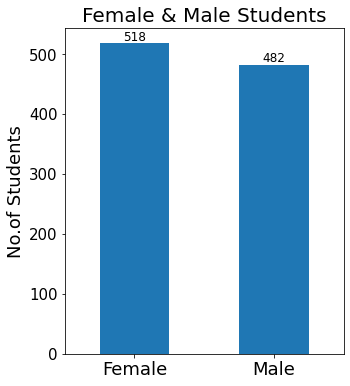

In [9]:
#Alternatively, we can plot a graph usig Count plot, which gives us the count of total Female and Male students.
gender_count = stu_data['gender'].value_counts()
gender_count1 = gender_count.plot.bar(rot=0,figsize = (5,6))
plt.title('Female & Male Students',fontsize=20)
plt.xlabel(None)
plt.ylabel('No.of Students',fontsize=18)
plt.xticks([0, 1], ['Female', 'Male'],fontsize=18)
plt.yticks(fontsize=15)
plt.bar_label(gender_count1.containers[0],fontsize=12)
plt.show()

# 2. What do you think about the students' parental level of education?

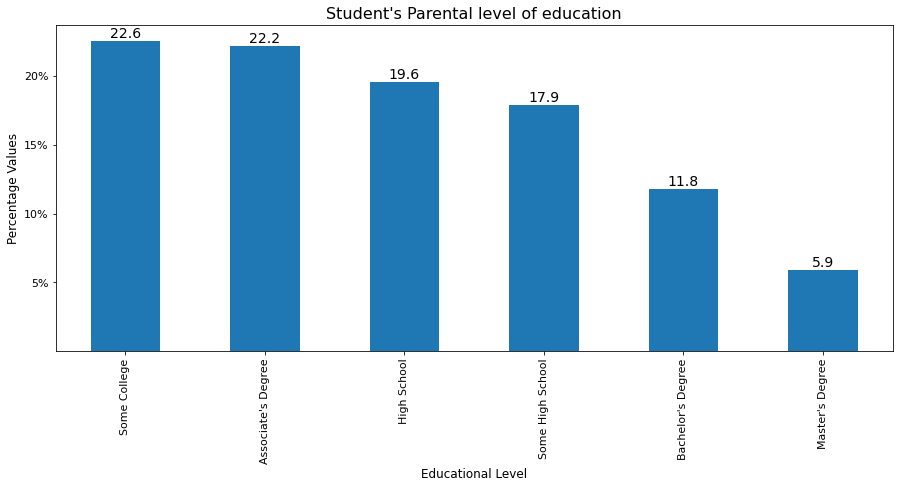

In [10]:
#With the help of a graph we can get some idea about students' parental level of education
plt.figure(figsize = (15,6)) 
edu_level_count1 = stu_data["parental level of education"].value_counts(normalize=True) #To get the percentage count
edu_level_count1 = edu_level_count1*100 #Multiply by 100 to remove the decimal values of relative frequencies of the unique values

edu_level_count2 = edu_level_count1.plot(kind = 'bar') 
plt.title("Student's Parental level of education",fontsize = 16)
plt.xlabel('Educational Level',fontsize = 12)
plt.ylabel('Percentage Values',fontsize = 12)
plt.xticks([0,1,2,3,4,5],["Some College","Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"],fontsize = 11)
plt.yticks([5,10,15,20],['5%','10%','15%','20%'],fontsize = 11)
plt.bar_label(edu_level_count2.containers[0],fontsize=14)
plt.show()

From the above graph we clearly understand that most of the parents (62.5%) received College education or above. This indicats that students parents have good educational backgrounds.

Only 37.5% of parents with only High school eduational background.

In [11]:
#To understand the number count of parental level of education
edu_level_parental = stu_data["parental level of education"].value_counts().rename_axis('Parental level of education').reset_index(name='Counts')

edu_level_parental.style.hide_index()

Parental level of education,Counts
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


Total no.of parents who have Some college education or above; 226+222+118+59 = 625

Total no.of parents who have only Some High school or High school; 196+179 = 375

So we clearly see that its almost double the numbers for those with some college education or above when compaired with parents who have only Some High school or High school.

# 3. Who scores the most on average for math, reading and writing based on

Gender

In [18]:
#To find the average score of the differnet exams by gender we use groupby() and mean() 
gender_mean = stu_data.groupby('gender')['math score','reading score','writing score'].mean()
#To compare the average scores and to know who performed better, use style.highlight_max(), this will highlight the max value
gender_mean.style.highlight_max(axis=0, props='font-weight:bold;')

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


From the above table we can see that Male students performed well in Math exam and for both Reading and Writing exams Female students performed well than Male students.

So in general if we consider all the exams together, we see Female students performed well than Male students.

● Test preparation course

In [20]:
#To find the average score of the differnet exams by test preparation course we use groupby() and mean() 
prep_mean = stu_data.groupby('test preparation course')['math score','reading score','writing score'].mean()
#To compare the average scores and to know who performed better, use style.highlight_max(), this will high light the max value
prep_mean.style.highlight_max(axis=0, props='font-weight:bold;')

,math score,reading score,writing score
test preparation course,,,
completed,69.966480,74.175978,74.684358
none,63.789720,66.417445,64.457944


From the above table we can see that students who completed the 'Test Preparation Course' performed well in all exams than those who didn't attended the course.

So in general we can say that Test Preparation Course helped the students performed well in their exams.

# 4. What do you think about the scoring variation for math, reading and writing based on

Gender

In [21]:
#To get more insights, we calulte the Mean, Mean and Standard Deviation 
gender_std = stu_data.groupby("gender").agg([np.mean,np.median, np.std])
gender_std.style


With the help of Mean and Median we can find measure of central tendency and with the help of Standard Deviation we can find measures the dispersion.

From the above table we can see that in all cases(exams) mean(average) is less than median(middle value). This make us to conclude that there are more students who got less scores than average score and this making the avgeage lie below the median scores.

When we consider the Standard deviation(how the score are spread around average score), we see that they are much high. All exam have 14 or above standard deviation.

This clearly indicates that the marks are very much spread between 0 and 100.

● Test preparation course

In [22]:
prep_std = stu_data.groupby("test preparation course").agg([np.mean,np.median, np.std])
prep_std.style

With the help of Mean and Median we can find measure of central tendency and with the help of Standard Deviation we can find measures the dispersion.

From the above table we can see that in all cases(exams) mean(average) is less than median(middle value). This make us to conclude that there are more students who got less scores than average score and this making the avgeage lie below the median scores.

When we consider the Standard deviation(how the score are spread around average score), we see that they are much high. All exam have 13 or above standard deviation. This clearly indicates that the marks are very much spread between 0 and 100.

When we compare both tables we see that 'Test Prepation Course' helping the Students to get more score and it is very much helpful. And students who not attended the Test Preparion course are the main reason for the high spread of scores, because we see that Standerd deviation is less for those who completed than those who didn't. If all students attend the 'Test Prepation Course' the average scores will be much better for all exams.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [23]:
#To achive this we find the quantile of the data and in this case 75th quantile.
math_quant = stu_data['math score']
np.quantile(math_quant, .75)

77.0

In [24]:
#To find no.fo students who above 75th quantile and show it as table
stu_math = stu_data[stu_data['math score'] >= 77]
print('The table showing the list of students who are eligible for the bonus points:')
stu_math.style.hide_index()

The table showing the list of students who are eligible for the bonus points:


gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
female,group A,high school,free/reduced,completed,77,88,85
female,group B,master's degree,free/reduced,completed,77,97,94
female,group B,bachelor's degree,free/reduced,none,77,85,87
female,group B,master's degree,standard,none,77,90,84
female,group B,high school,standard,completed,77,82,89
female,group C,bachelor's degree,standard,none,77,88,87
female,group C,bachelor's degree,standard,completed,77,94,95
female,group C,some college,free/reduced,none,77,90,91
female,group C,some high school,standard,completed,77,90,85
female,group C,some high school,standard,none,77,91,88


In [25]:
#To find total the number of students
print('Total number of students eligible for the bonus points:',stu_math.shape[0])

Total number of students eligible for the bonus points: 255


A quartile is a statistical term that describes a division of observations into four defined intervals(25%+25%+25%+25%).

In this case, management need to find top 25% students who scored well in Math exam. So this is equal to the students who are lie in 75th quartile and above.

So we find the corresponding mark of 75th quartile(77) and find all scored above or equal to this score(>= 77).